## Deadline
Wednesday October 25, 2017 at 11:59PM

## Important Notes
* Make sure you push on GitHub your Notebook with all the cells already evaluated (i.e., you don't want your colleagues to generate unnecessary Web traffic during the peer review)
* Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you plan to implement!
* Please write all your comments in English, and use meaningful variable names in your code.

## Background
In this homework we will extract interesting information from www.topuniversities.com and www.timeshighereducation.com, two platforms that maintain a global ranking of worldwide universities. This ranking is not offered as a downloadable dataset, so you will have to find a way to scrape the information we need!
You are not allowed to download manually the entire ranking -- rather you have to understand how the server loads it in your browser. For this task, Postman with the Interceptor extension can help you greatly. We recommend that you watch this [brief tutorial](https://www.youtube.com/watch?v=jBjXVrS8nXs&list=PLM-7VG-sgbtD8qBnGeQM5nvlpqB_ktaLZ&autoplay=1) to understand quickly how to use it.

## Assignment
1. Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)). In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total). Some information is not available in the main list and you have to find them in the [details page](https://www.topuniversities.com/universities/ecole-polytechnique-f矇d矇rale-de-lausanne-epfl).
Store the resulting dataset in a pandas DataFrame and answer the following questions:
- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
- Answer the previous question aggregating the data by (c) country and (d) region.

Plot your data using bar charts and describe briefly what you observed.

2. Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)). Repeat the analysis of the previous point and discuss briefly what you observed.

3. Merge the two DataFrames created in questions 1 and 2 using university names. Match universities' names as well as you can, and explain your strategy. Keep track of the original position in both rankings.

4. Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

5. Can you find the best university taking in consideration both rankings? Explain your approach.

Hints:
- Keep your Notebook clean and don't print the verbose output of the requests if this does not add useful information for the reader.
- In case of tie, use the order defined in the webpage.

# Import Libraries

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn
%matplotlib inline

# Part1. QS Ranking

In [2]:
URL = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051_indicators.txt'
r = requests.get(URL)

In [3]:
universites_info = r.json()['data'][0:200]

# links
university_links = [BeautifulSoup(university['uni'], 'html.parser').find('a') for university in universites_info]

# name as index
data_qs = pd.DataFrame([university_link.text for university_link in university_links], columns = ['university'])

# rank
data_qs['rank'] = [university['overall_rank'] for university in universites_info]
# country
data_qs['country'] = [university['location'] for university in universites_info]
# region
data_qs['region'] = [university['region'] for university in universites_info]


### 1. extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total)

In [4]:
def getData(webpage, label):
    try:
        number = (int)(webpage.find('div', class_ = label).find('div', class_ = 'number').text.replace(',',''))
    except AttributeError:
        number = 0
    return number

# access details of each university
header = 'https://www.topuniversities.com'
web_addresses = [header + university_link.get('href') for university_link in university_links]
university_pages = [requests.get(web_address) for web_address in web_addresses] 
university_details = [BeautifulSoup(page.text, 'html.parser') for page in university_pages] 

# number of international students
data_qs['international students'] = [getData(page, 'total inter') for page in university_details]
# number of total students
data_qs['total students'] = [getData(page, 'total student') for page in university_details]
# number of foreign faculty
data_qs['international faculties'] = [getData(page, 'inter faculty') for page in university_details]
# number of total faculty
data_qs['total faculties'] = [getData(page, 'total faculty') for page in university_details]

data_qs.head()

,university,rank,country,region,international students,total students,international faculties,total faculties
0,Massachusetts Institute of Technology (MIT),1,United States,North America,3717,11067,1679,2982
1,Stanford University,2,United States,North America,3611,15878,2042,4285
2,Harvard University,3,United States,North America,5266,22429,1311,4350
3,California Institute of Technology (Caltech),4,United States,North America,647,2255,350,953
4,University of Cambridge,5,United Kingdom,Europe,6699,18770,2278,5490


### 2(a) Which are the best universities in term of ratio between faculty members and students

In [5]:
data_ratio_faculty_students = pd.DataFrame(data_qs[['university', 'country', 'region', 'total faculties','total students']])
data_ratio_faculty_students['ratio(%)'] = data_qs['total faculties']/data_qs['total students'] * 100
data_ratio_faculty_students = data_ratio_faculty_students.sort_values('ratio(%)', ascending=False)
data_ratio_faculty_students.head()

,university,country,region,total faculties,total students,ratio(%)
3,California Institute of Technology (Caltech),United States,North America,953,2255,42.261641
15,Yale University,United States,North America,4940,12402,39.832285
5,University of Oxford,United Kingdom,Europe,6750,19720,34.229209
4,University of Cambridge,United Kingdom,Europe,5490,18770,29.248801
16,Johns Hopkins University,United States,North America,4462,16146,27.635328


### 2(b) Which are the best universities in term of ratio of international students

In [6]:
data_ratio_inter_students = pd.DataFrame(data_qs[['university', 'country', 'region', 'international students','total students']])
data_ratio_inter_students['ratio(%)'] = data_qs['international students']/data_qs['total students'] * 100
data_ratio_inter_students = data_ratio_inter_students.sort_values('ratio(%)', ascending=False)
data_ratio_inter_students.head()

,university,country,region,international students,total students,ratio(%)
34,London School of Economics and Political Scien...,United Kingdom,Europe,6748,9760,69.139344
11,Ecole Polytechnique Fédérale de Lausanne (EPFL),Switzerland,Europe,5896,10343,57.004738
7,Imperial College London,United Kingdom,Europe,8746,16090,54.356743
199,Maastricht University,Netherlands,Europe,8234,16385,50.253280
46,Carnegie Mellon University,United States,North America,6385,13356,47.806229


### 3(c) best university based on the ratio between faculty and students by country

In this question, we show the university with the highest faculty-student ratio for every country

In [7]:
data_ratio_faculty_students.sort_values(['ratio(%)'], ascending=False).groupby('country').first()

,university,region,total faculties,total students,ratio(%)
country,,,,,
Argentina,Universidad de Buenos Aires (UBA),Latin America,16421,122301,13.426710
Australia,The Australian National University,Oceania,1600,14442,11.078798
Austria,University of Vienna,Europe,3411,45967,7.420541
Belgium,Vrije Universiteit Brussel (VUB),Europe,1792,9284,19.302025
Brazil,Universidade de São Paulo,Latin America,5582,65711,8.494773
Canada,McMaster University,North America,3231,23702,13.631761
Chile,Pontificia Universidad Católica de Chile (UC),Latin America,2260,27003,8.369440
China,Tsinghua University,Asia,5506,36300,15.168044
Denmark,Technical University of Denmark,Europe,2117,8878,23.845461


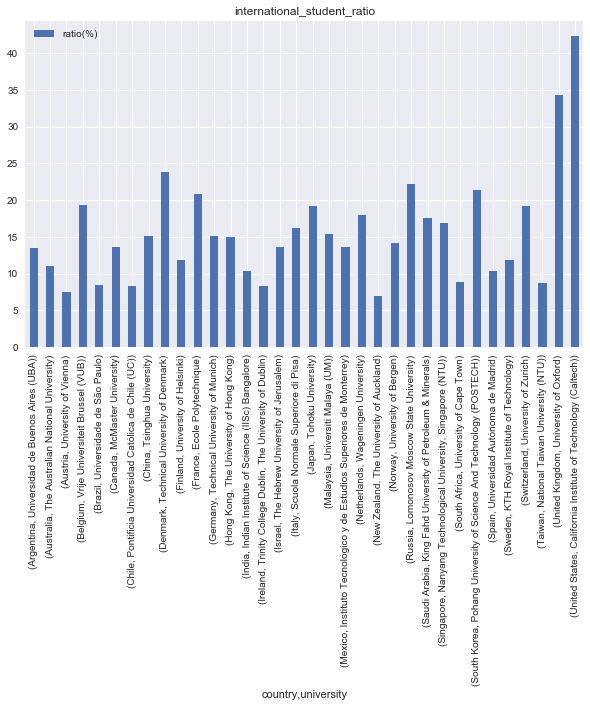

In [8]:
data_ratio_faculty_students.sort_values(['ratio(%)'], ascending=False).groupby('country', as_index = False)\
.first().plot(y='ratio(%)', x=['country','university'], kind='bar',\
              grid=True, figsize=(10, 6), title='international_student_ratio')

### 3(c) best university based on the ratio between international students and total students by country

In [9]:
data_ratio_inter_students.sort_values(['ratio(%)'], ascending=False).groupby('country').first()

,university,region,international students,total students,ratio(%)
country,,,,,
Argentina,Universidad de Buenos Aires (UBA),Latin America,27109,122301,22.165804
Australia,The University of Melbourne,Oceania,18030,42182,42.743350
Austria,University of Vienna,Europe,14468,45967,31.474754
Belgium,Vrije Universiteit Brussel (VUB),Europe,1853,9284,19.959069
Brazil,Universidade Estadual de Campinas (Unicamp),Latin America,966,26572,3.635406
Canada,McGill University,North America,9540,28837,33.082498
Chile,Pontificia Universidad Católica de Chile (UC),Latin America,991,27003,3.669963
China,Peking University,Asia,7090,42136,16.826467
Denmark,Technical University of Denmark,Europe,2098,8878,23.631449


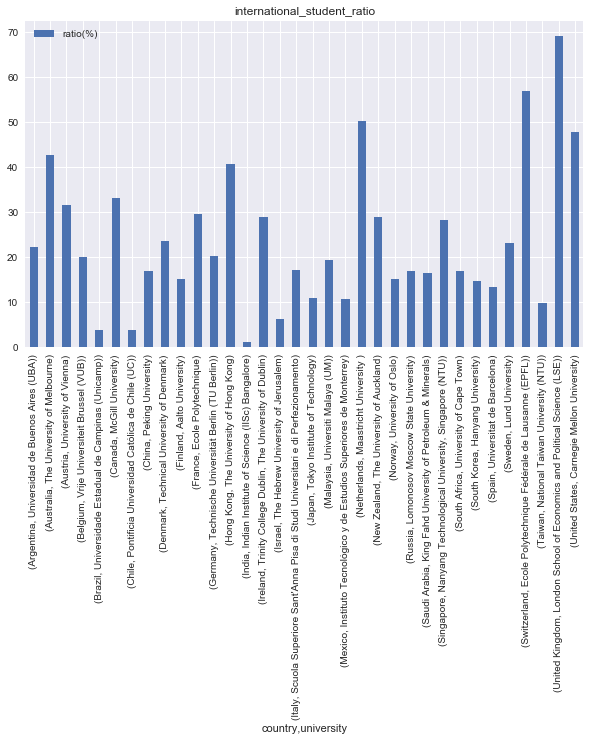

In [10]:
data_ratio_inter_students.sort_values(['ratio(%)'], ascending=False).groupby('country', as_index = False)\
.first().plot(y='ratio(%)', x=['country','university'], kind='bar',\
              grid=True, figsize=(10, 6), title='international_student_ratio')

### 3(d) best university based on the ratio between faculty and student by region

In [11]:
data_ratio_faculty_students.sort_values(['ratio(%)'], ascending=False).groupby('region').first()

,university,country,total faculties,total students,ratio(%)
region,,,,,
Africa,University of Cape Town,South Africa,1733,19593,8.844996
Asia,Pohang University of Science And Technology (P...,South Korea,664,3117,21.302534
Europe,University of Oxford,United Kingdom,6750,19720,34.229209
Latin America,Instituto Tecnológico y de Estudios Superiores...,Mexico,1822,13376,13.621411
North America,California Institute of Technology (Caltech),United States,953,2255,42.261641
Oceania,The Australian National University,Australia,1600,14442,11.078798


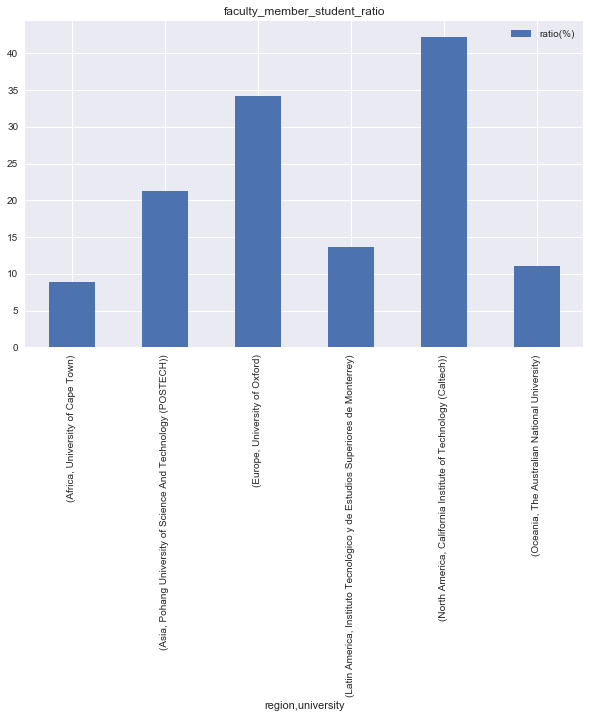

In [12]:
data_ratio_faculty_students.sort_values(['ratio(%)'], ascending=False).groupby('region', as_index = False)\
.first().plot(y='ratio(%)', x=['region','university'], kind='bar',\
              grid=True, figsize=(10, 6), title='faculty_member_student_ratio')


### 3(d) best university based on the ratio between international students and total students by region

In [13]:
data_ratio_inter_students.sort_values(['ratio(%)'], ascending=False).groupby('region').first()

,university,country,international students,total students,ratio(%)
region,,,,,
Africa,University of Cape Town,South Africa,3325,19593,16.970347
Asia,The University of Hong Kong,Hong Kong,8230,20214,40.714356
Europe,London School of Economics and Political Scien...,United Kingdom,6748,9760,69.139344
Latin America,Universidad de Buenos Aires (UBA),Argentina,27109,122301,22.165804
North America,Carnegie Mellon University,United States,6385,13356,47.806229
Oceania,The University of Melbourne,Australia,18030,42182,42.743350


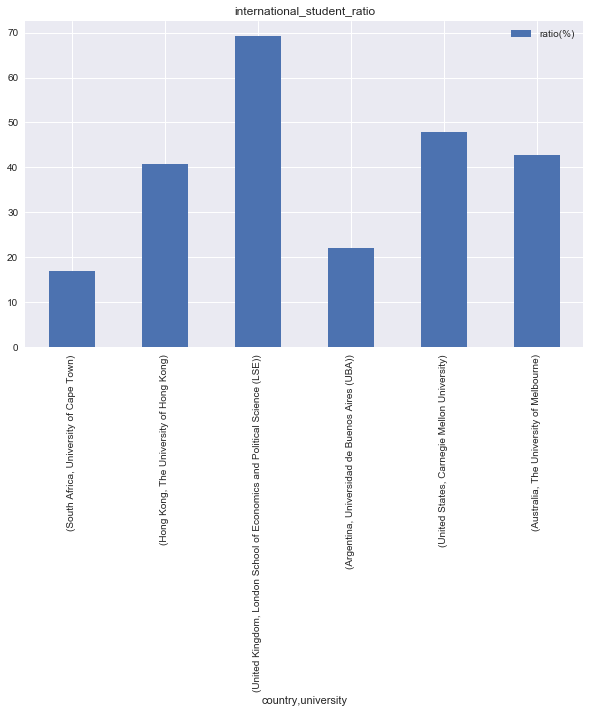

In [14]:
data_ratio_inter_students.sort_values(['ratio(%)'], ascending=False).groupby('region', as_index = False)\
.first().plot(y='ratio(%)', x=['country','university'], kind='bar',\
              grid=True, figsize=(10, 6), title='international_student_ratio')

# Part2. Times Ranking

### 1. Obtain the 200 top-ranking universities in www.timeshighereducation.com (ranking 2018)

In [15]:
URL = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r = requests.get(URL)

universites_info = r.json()['data'][:200]

data_times = pd.DataFrame([(int)(university['rank'].replace('=','')) for university in universites_info], columns= ['rank'])
data_times['university'] = [university['name'] for university in universites_info]
data_times['country'] = [university['location'] for university in universites_info]
data_times['proportion of international students(%)'] = [(float)(university['stats_pc_intl_students'].replace('%','')) for university in universites_info]
data_times['student/staff (%)'] = [(float)(university['stats_student_staff_ratio']) for university in universites_info]

### 2(a) best university based on the ratio between international students and total student

In [16]:
data_times.sort_values('proportion of international students(%)', ascending=False).head()

,rank,university,country,proportion of international students(%),student/staff (%)
24,25,London School of Economics and Political Science,United Kingdom,71.0,12.2
178,179,University of Luxembourg,Luxembourg,57.0,14.6
37,38,École Polytechnique Fédérale de Lausanne,Switzerland,55.0,11.2
7,8,Imperial College London,United Kingdom,55.0,11.4
102,103,Maastricht University,Netherlands,50.0,18.0


### 2(b) best university based on the ratio between staff and student
Because Times provides student-staff ratio, not staff-student ratio, so the lower the ratio is, the better the university is  

In [17]:
data_times.sort_values('student/staff (%)')

,rank,university,country,proportion of international students(%),student/staff (%)
105,105,Vanderbilt University,United States,13.0,3.3
109,109,University of Copenhagen,Denmark,14.0,4.1
12,13,Johns Hopkins University,United States,24.0,4.3
11,12,Yale University,United States,21.0,4.3
153,153,University of Rochester,United States,29.0,4.3
97,98,Emory University,United States,19.0,4.4
16,17,Duke University,United States,22.0,4.5
114,115,École Polytechnique,France,36.0,5.1
183,184,Scuola Normale Superiore di Pisa,Italy,7.0,5.2
101,100,University of Pittsburgh,United States,10.0,5.9


### 2(c) best university based on the ratio between international students and total student in every country
In ranking based on country and region, because Times only provides country, so we skip the part for ranking based on region

In [18]:
data_times.sort_values('proportion of international students(%)', ascending=False).groupby('country').first()

,rank,university,proportion of international students(%),student/staff (%)
country,,,,
Australia,32,University of Melbourne,40.0,26.6
Austria,165,University of Vienna,26.0,20.8
Belgium,175,Université Libre de Bruxelles,35.0,43.4
Canada,34,University of British Columbia,29.0,18.1
China,27,Peking University,16.0,8.9
Denmark,153,Technical University of Denmark,24.0,6.0
Finland,190,Aalto University,20.0,20.2
France,115,École Polytechnique,36.0,5.1
Germany,41,Technical University of Munich,23.0,54.4


### 2(c) best university based on the ratio between student and staff in every country

In [19]:
data_times.sort_values('student/staff (%)', ascending=False).groupby('country').first()

,rank,university,proportion of international students(%),student/staff (%)
country,,,,
Australia,65,University of Queensland,26.0,35.7
Austria,165,University of Vienna,26.0,20.8
Belgium,175,Université Libre de Bruxelles,35.0,43.4
Canada,78,McMaster University,15.0,24.7
China,169,Nanjing University,10.0,14.2
Denmark,109,Aarhus University,12.0,14.3
Finland,190,Aalto University,20.0,20.2
France,196,Paris-Sorbonne University – Paris 4,15.0,30.2
Germany,100,University of Bonn,13.0,77.9


# Combine the ranking in QS and Times

In [20]:
# change the name of the column "ranking" to avoid the conflict
data_qs = data_qs.rename(columns = {'rank':'rank_qs'})
data_times = data_times.rename(columns = {'rank':'rank_times'})

To combine them, we have to take care of the following things:
1. Some of letters are not in English, we should change all of them to English
2. QS use abbreviation such as EPFL, MIT ... etc, we have to remove them to make merging easier
3. Some names of universities are not English names, we need to filter them and find their correspondence manually

In [21]:
# 1. change the French/German letters into English letter
translationTable = str.maketrans("éàèùâêîôûçüäóãÉò", "eaeuaeioucuaoaEo")
data_qs['university'] = data_qs.university.apply(lambda x: x.translate(translationTable))
data_times['university'] = data_times.university.apply(lambda x: x.translate(translationTable))

In QS ranking, they use the non-English names for universities in non-English speaking region, we output the merged dataframe into csv file and compare the universities with blanks manually to find the exceptions. The following operations are making the university have the same name in both rankings

In [22]:
# 3. change the name
data_qs.loc[67, 'university'] = 'Heidelberg University'
data_qs.loc[87, 'university'] = 'Trinity College Dublin'
data_qs.loc[40, 'university'] = 'Korea Advanced Institute of Science and Technology'
data_qs.loc[6, 'university'] = 'University College London'
data_qs.loc[106, 'university'] = 'Karlsruhe Institute of Technology'
data_qs.loc[119, 'university'] = 'Humboldt University of Berlin'
data_qs.loc[124, 'university'] = 'Free University of Berlin'
data_qs.loc[129, 'university'] = 'University of Montreal'
data_qs.loc[130, 'university'] = 'Pierre and Marie Curie University'
data_qs.loc[143, 'university'] = 'Technical University of Berlin'
data_qs.loc[163, 'university'] = 'University of Tubingen'
data_qs.loc[170, 'university'] = 'University of Freiburg'
data_qs.loc[197, 'university'] = 'Autonomous University of Barcelona'
data_qs.loc[199, 'university'] = 'Maastricht University'


data_times.loc[9, 'university'] = 'ETH Zurich - Swiss Federal Institute of Technology'
data_times.loc[34, 'university'] = 'Ludwig-Maximilians-Universitat Munchen'
data_times.loc[35, 'university'] = "King's College London"
data_times.loc[50, 'university'] = "Washington University in St. Louis"
data_times.loc[56, 'university'] = 'University of North Carolina, Chapel Hill'
data_times.loc[63, 'university'] = 'Wageningen University'
data_times.loc[128, 'university'] = 'Universite catholique de Louvain'
data_times.loc[136, 'university'] = 'Pohang University of Science And Technology'
data_times.loc[155, 'university'] ='Technische Universitat Dresden'
data_times.loc[193, 'country'] = 'Russia'

Here we define two functions we use to remove:
    1. abbreviation of university covered by parentheses: (abbreviation of university)
    2. the string "The"

In [23]:
def remove_parentheses(name):
    ind1 = name.find('(')
    ind2 = name.find(')')
    if ind1 == -1:
        return name
    else:
        while ind2 + 1 < len(name):
            if name[ind2 + 1] == ' ':
                ind2 = ind2 + 1
            else:
                break
        if ind2 + 1 == len(name):
            while ind1 - 1 >= 0:
                if name[ind1 - 1] == ' ':
                    ind1 = ind1 - 1
                else:
                    break
        name = name.replace(name[ind1:ind2+1],'')
        return name
    
def remove_The(name):
    ind = name.find('The')
    if ind == -1:
        return name
    else:
        name = name.replace(name[0:4],'')
        return name

# remove parentheses
data_qs.university = data_qs.university.apply(lambda x: remove_parentheses(x))
data_times.university = data_times.university.apply(lambda x: remove_parentheses(x))
# remove "The"
data_qs.university = data_qs.university.apply(lambda x: remove_The(x))

Now, we merge two dataframes and omit the universities which doesn't exist in both rankings

In [24]:
data_merge = pd.merge(data_qs, data_times)
data_merge

,university,rank_qs,country,region,international students,total students,international faculties,total faculties,rank_times,proportion of international students(%),student/staff (%)
0,Massachusetts Institute of Technology,1,United States,North America,3717,11067,1679,2982,5,34.0,8.7
1,Stanford University,2,United States,North America,3611,15878,2042,4285,3,22.0,7.5
2,Harvard University,3,United States,North America,5266,22429,1311,4350,6,26.0,8.9
3,California Institute of Technology,4,United States,North America,647,2255,350,953,3,27.0,6.5
4,University of Cambridge,5,United Kingdom,Europe,6699,18770,2278,5490,2,35.0,10.9
5,University of Oxford,6,United Kingdom,Europe,7353,19720,2964,6750,1,38.0,11.2
6,University College London,7,United Kingdom,Europe,14854,31080,2554,6345,16,49.0,10.5
7,Imperial College London,8,United Kingdom,Europe,8746,16090,2071,3930,8,55.0,11.4
8,University of Chicago,9,United States,North America,3379,13557,635,2449,9,25.0,6.2
9,ETH Zurich - Swiss Federal Institute of Techno...,10,Switzerland,Europe,7563,19815,1886,2477,10,38.0,14.6


In [25]:
# for university in data_times.university:
#     if university.find('College London') != -1:
#         print(university)
        
# for university in data_qs.university:
#     if university.find('College London') != -1:
#         print(university)
        
# data_qs1 = data_qs.copy()
# data_times1 = data_times.copy()